In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
pd.read_csv('ölmax.csv')

,Datum,Schluss/Letzter,Volumen,Eröffnungskurs,Hoch,Tief
0,03/29/2022,104.24,371233.0,103.47,107.84,98.44
1,03/28/2022,105.96,354375.0,112.92,111.89,102.83
2,03/25/2022,113.90,299911.0,111.75,114.12,108.68
3,03/24/2022,112.34,293172.0,114.47,116.64,110.61
4,03/23/2022,114.93,270946.0,108.85,115.40,108.38
...,...,...,...,...,...,...
2547,04/05/2012,103.31,219914.0,101.96,103.40,101.37
2548,04/04/2012,101.47,274676.0,104.09,104.12,101.09
2549,04/03/2012,104.01,224971.0,105.04,105.17,103.60
2550,04/02/2012,105.23,259773.0,103.27,105.46,102.08


In [148]:
df_öl = pd.read_csv('ölmax.csv')
df_öl['Date'] = pd.to_datetime(df_öl['Datum'])

df_dax = pd.read_csv('dax1990.csv')
df_dax['Date'] = pd.to_datetime(df_dax['Date'])
df_öl = df_öl.loc[df_öl['Date'].isin(df_dax['Date'])]
df_dax = df_dax.loc[df_dax['Date'].isin(df_öl['Date'])]
pd.merge(df_öl, df_dax, on='Date')
df = pd.DataFrame()
df[['dax','öl','date']] = pd.merge(df_öl, df_dax, on='Date')[['Close','Schluss/Letzter','Date']]

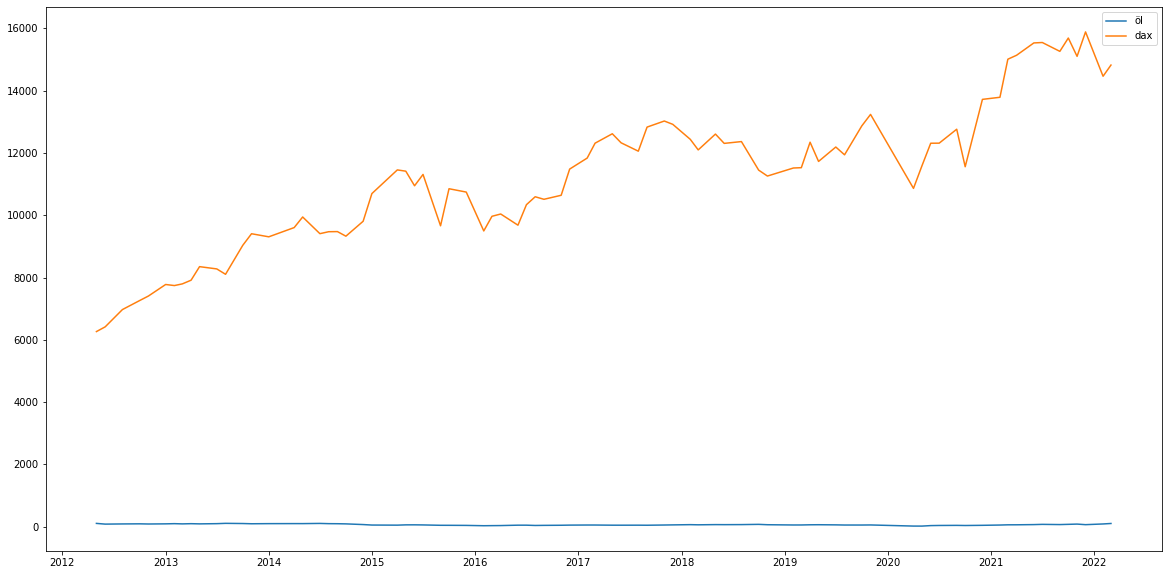

In [149]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(df['date'],df['öl']  ,label='öl')
ax.plot(df['date'],df['dax'], label='dax')
ax.legend()

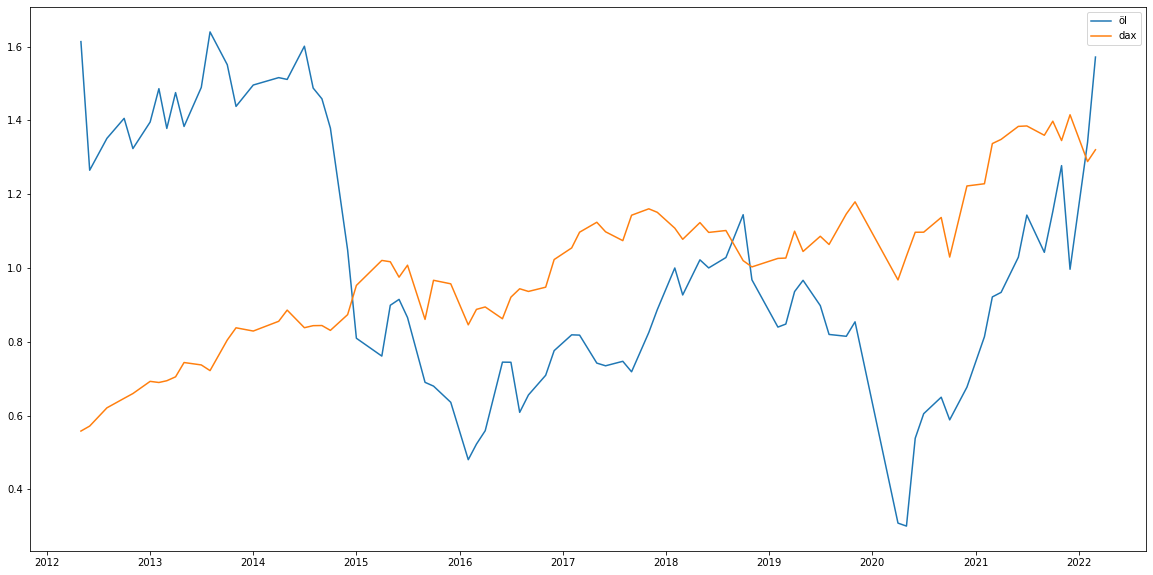

In [150]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
ax.plot(df['date'],df['öl']/np.mean(df['öl'])  ,label='öl')
ax.plot(df['date'],df['dax']/np.mean(df['dax']), label='dax')
ax.legend()

In [152]:
np.corrcoef(df['öl'],df['dax'])

array([[ 1.        , -0.37921552],
       [-0.37921552,  1.        ]])

In [38]:
df_dax['Date'][0]

'2017-04-01'

In [40]:
pd.to_datetime(df_dax['Date'][0])

Timestamp('2017-04-01 00:00:00')

In [18]:
ölpreise.head(50)
ölpreise['Date'][0][3:5]
ölpreise.apply( lambda x: x['Date'][3:5]=='01', axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1255    False
1256    False
1257    False
1258    False
1259    False
Length: 1260, dtype: bool

In [19]:
ölpreise.loc[ölpreise.apply( lambda x: x['Date'][3:5]=='01', axis=1)]

,Date,Close/Last,Volume,Open,High,Low
20,03/01/2022,103.41,674932,96.09,106.78,95.32
39,02/01/2022,88.20,354875,88.15,88.87,86.55
81,12/01/2021,65.57,577281,67.01,69.49,64.84
102,11/01/2021,84.05,391380,83.36,84.88,82.74
123,10/01/2021,75.88,366613,75.12,75.99,74.23
144,09/01/2021,68.59,376119,68.55,68.69,68.17
187,07/01/2021,75.23,595858,73.50,76.22,73.39
209,06/01/2021,67.72,551216,68.00,68.01,67.90
250,04/01/2021,61.45,577986,59.49,61.75,58.86
273,03/01/2021,60.64,438048,61.95,60.48,60.13


In [7]:
daxkurse

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-01,12368.820313,12486.290039,11941.570313,12438.009766,12438.009766,1644675400
1,2017-05-01,12478.459961,12841.660156,12433.509766,12615.059570,12615.059570,2005525000
2,2017-06-01,12623.610352,12951.540039,12319.000000,12325.120117,12325.120117,2051075600
3,2017-07-01,12396.339844,12676.519531,12097.360352,12118.250000,12118.250000,1774219500
4,2017-08-01,12147.889648,12336.000000,11868.839844,12055.839844,12055.839844,1736744300
5,2017-09-01,12101.150391,12828.860352,12050.530273,12828.860352,12828.860352,1770810200
6,2017-10-01,12866.269531,13255.379883,12849.589844,13229.570313,13229.570313,1560162000
7,2017-11-01,13342.440430,13525.559570,12847.879883,13023.980469,13023.980469,2121108500
8,2017-12-01,13044.150391,13338.910156,12810.129883,12917.639648,12917.639648,1619717800
9,2018-01-01,12897.690430,13596.889648,12745.150391,13189.480469,13189.480469,2108953300


In [64]:
jahre = [20,36,56,73]
flausen = [42,13,11,65]
haare = []

In [65]:
np.corrcoef(jahre, flausen)

array([[1.        , 0.34159696],
       [0.34159696, 1.        ]])

In [132]:
%ls

Dax.csv         Ölpreis.csv     Untitled.ipynb  dax1990.csv     ölmax.csv


In [134]:
pd.read_csv('ölmax.csv')

,Datum,Schluss/Letzter,Volumen,Eröffnungskurs,Hoch,Tief
0,03/29/2022,104.24,371233.0,103.47,107.84,98.44
1,03/28/2022,105.96,354375.0,112.92,111.89,102.83
2,03/25/2022,113.90,299911.0,111.75,114.12,108.68
3,03/24/2022,112.34,293172.0,114.47,116.64,110.61
4,03/23/2022,114.93,270946.0,108.85,115.40,108.38
...,...,...,...,...,...,...
2547,04/05/2012,103.31,219914.0,101.96,103.40,101.37
2548,04/04/2012,101.47,274676.0,104.09,104.12,101.09
2549,04/03/2012,104.01,224971.0,105.04,105.17,103.60
2550,04/02/2012,105.23,259773.0,103.27,105.46,102.08


In [153]:
piraten = [35, 20,5,0.02]
temp = [14.2,14.7,15.2,16]
np.cov(piraten, temp)

array([[249.8001    , -11.4935    ],
       [-11.4935    ,   0.58916667]])